# THE FINAL TASK 


## 1. TASK 1

### Encoding the categorical values of the dataset, creating x as input features and y as output column.

### Import Necessary Packages and Load the Dataset

In [3]:
#Import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [4]:
#Load the data to a DataFrame
df = pd.read_csv('student-math.csv')

#Calculate and insert Final Grade by adding G1, G2 & G3
final_grade = df.G1 + df.G2 + df.G3
df.insert(33, 'final_grade', final_grade)
df_origin = df

### Get Dummy Variables 

In [5]:

#dummies = pd.get_dummies(df, columns=['school','activities','schoolsup','famsup','paid','higher','internet','nursery','famsize','Mjob', 'Fjob','reason', 'guardian','Pstatus','sex','age', 'address'])
dummy_list = []

for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        continue
    dummy_list.append(i) 

df = pd.get_dummies(df, columns=dummy_list)    


In [6]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Split the Data into Dependent Variable or Target Variable and Independent Variables

Target Variable will contain the column "final_grade" .

And the Independent variable will contain all columns except "G3" & "final_grade" column                                                                                                                                                                                                                                                                                    

In [7]:
#Now our data is processed .. 
#Now split the data into necessary features and target column
#Assign Test features to X
# Assign the target variable or the target column to y

y = df.final_grade
X = df.drop(['G3','final_grade'], axis=1)

np.shape(X)

(395, 58)

In [8]:
# Compute final_grade and insert in the dataset
np.shape(y)

(395,)

In [9]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


## 2. TASK 2

### Split the Data into Training and Testing Data 

Using train_test_split() method of sklearn's model_selection module, the Data is splitted into training and testing Data.

And We took test_size 0.11 Because , We noted that at this particular test size the accuracy is maximum.

Before you split your data, it is important that you randomize all rows in the
dataset. This helps to avoid bias in your model, as your original dataset might
be arranged sequentially depending on the time it was collected or some other
factor. Unless you randomize your data, you may accidentally omit important
variance from the training data that will cause unwanted surprises when youapply the trained model to your test data

In [40]:
#Now our X and y are refined ..
#Split the data into 4 parts X_train, X_test, y_train, y_test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 31)


### Creating A Model And Fitting And Predicting

We created a LinearRegression model here.

Fitted it with The Training Data i.e., X_train & y_train and The Testing Data i.e., X_test, y_test.

Then We predicted by feeding the model some testing data and stored in a variable.

###### Note the Accuracy.

In [41]:
#Create a model..
reg = LinearRegression(normalize=True)

In [42]:
#Fit the model , feeding it the training data: X_train, y_train
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [43]:
#Predict using the model feeding it the testing data : X_test, y_test  and assign it to y_pred
y_pred = reg.predict(X_test)

In [44]:
# Now as you predicted using the data...Its time to Check its accuracy
print(reg.score(X_test, y_test))

0.9709623543680981


## Visualization 
    
### Plot Between Predicted Values and the True Values 

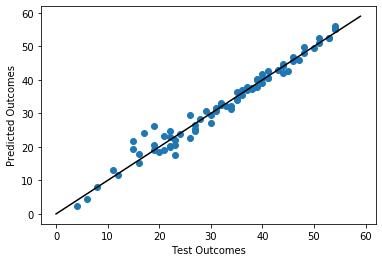

In [45]:
# Now its time for visualising the data and the predicted data
plt.plot(range(60), range(60), c='k')
plt.xlabel('Test Outcomes')
plt.ylabel('Predicted Outcomes')
plt.scatter(y_test, y_pred)
plt.show()

# Backward Elimination Using statsmodels.api
We can see that our predictions are close enough to the test set but how do we find the most important factor contributing to the profit. We know that the equation of a multiple linear regression line is given by y=b1+b2x+b3x’+b4*x”+……. where b1, b2, b3, … are the coefficients and x, x’, x” are all independent variables. Since we don’t have any ‘x’ for the first coefficient we assume it can be written as a product of b and 1 and hence we append a column of ones. There are libraries that take care of it but since we are using the stats model library we need to explicitly add the column.

In [46]:
x_c = sm.add_constant(X)
x_c = np.append(arr = np.ones((395, 1)).astype(int), values = x_c, axis = 1)


In [47]:

x_opt = x_c[:, :-1]

#Backward Elimination function:

def backwardElimination(x, sl):
    
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
#Specify Significance level as SL, take it 5%...
SL = 0.05 
x_opt = x_c[:, [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]]
X_modeled = backwardElimination(x_opt, SL)

In [48]:
X_modeled.shape


(395, 5)

In [78]:
x_train, x_test, Y_train, Y_test = train_test_split(X_modeled, y, test_size=0.12, random_state=31)

In [79]:
reg.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [80]:
print(reg.score(x_test, Y_test))

0.985641988668829


# Scaling the Data
    .Many models use some form of distance to inform them
    .Features on larger scales can unduly influence the model
    .We want features to be on a similar scale

We are using Scaler here for scaling our data. What it does is Standardize the dataset & Center to the mean and component wise scale to unit variance.



In [88]:
# We can Scale our data So, That It will show better accuracy
X_scaled = scale(X_modeled)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.12, random_state=31)

reg.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = reg.predict(X_test_scaled)

print(reg.score(X_test_scaled, y_test_scaled))



0.985641988668829


### We noted that , Accuracy remained same after scaling too. Its because our Dataset is not very large , So Our model didn't face any problems.

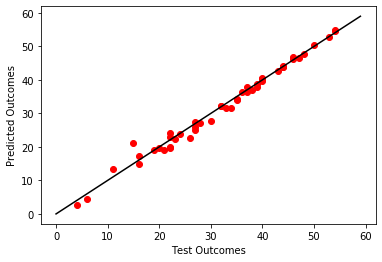

In [82]:
# Now its time for visualising the data and the predicted data
plt.plot(range(60), range(60), c='k')
plt.xlabel('Test Outcomes')
plt.ylabel('Predicted Outcomes')
plt.scatter(y_test_scaled, y_pred_scaled, c='r')
plt.show()

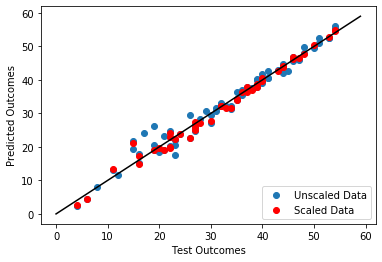

In [83]:
# Now its time for visualising the data and comparing
plt.plot(range(60), range(60), c='k')

x = plt.scatter(y_test, y_pred)

plt.xlabel('Test Outcomes')
plt.ylabel('Predicted Outcomes')
ax = plt.scatter(y_test_scaled, y_pred_scaled, c='r')

plt.legend((x, ax),
          ('Unscaled Data', 'Scaled Data'),
          loc = 'lower right')
plt.xlabel('Test Outcomes')
plt.ylabel('Predicted Outcomes')
plt.show()


### Also From Two Plots i.e., One with Scaled Data and Other with Unscaled Data , We can Observe that the dots are a littlecloser to the Accuracy Line in Case of Scaled Data

### Cross-Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=12, test_size=0.2, random_state=31)

rl = make_pipeline(preprocessing.StandardScaler(), svm.LinearSVR(C=1.0, epsilon=0.35))
cross_val_score(rl, X_scaled, y, cv=cv)

array([0.97437522, 0.97239786, 0.95482797, 0.96018755, 0.9790576 ,
       0.97619199, 0.96739014, 0.95666266, 0.96830973, 0.97120066,
       0.95891081, 0.98459867])

In [85]:
rl.fit(X_train_scaled, y_train_scaled)
print(rl.score(X_test_scaled, y_test_scaled))

0.9865340637503662


### We Have Trained and Tested The Data And Measured The Accuracy. 

We got an Accuracy of 98.64%

### Effect on Accuracy after taking test_size = 0.07

In [86]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.07, random_state=31)

reg.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = reg.predict(X_test_scaled)

print(reg.score(X_test_scaled, y_test_scaled))

0.9919855577702236


### WOAH!! The Accuracy surged to 99.19%

Its tempting but Its inefficient to take this amount of test size, As it can overfit the model.
So We should take test size 10% to 30%.

### But What If We take test size of 12% with cross-validation ? Lets' See

In [87]:
cv = ShuffleSplit(n_splits=12, test_size=0.12, random_state=31)

rl = make_pipeline(preprocessing.StandardScaler(), svm.LinearSVR(C=1.0, epsilon=0.35))
cross_val_score(rl, X_scaled, y, cv=cv)
rl.fit(X_train_scaled, y_train_scaled)
print(rl.score(X_test_scaled, y_test_scaled))


0.9949722127296436


## See The Accuracy .. Its over 99%

# @Some Insights

## Relationship Between Age and Final Grade of Students

We can see the students of the age group 20 are usually better at scoring high grades.
Also , Note that As the age increases they get distracted from studies more i.e, they score less grades on average.May be syllabus is difficult ;)

In [190]:
# Plot and visualise

def rel_plot(columnName, xLabel, yLabel):
    array = df_origin.loc[:, columnName].unique()
    dicti = {}
    for i in array:
        dicti[i] = 0  
    for i in range(395):
        dicti[df_origin[columnName].loc[i]] += df_origin['final_grade'].loc[i]

    print(dicti) 
    counts = df_origin[columnName].value_counts()  
    for key,value in dicti.items():
        dicti[key] = value/counts[key]
    axe=[]
    for key,value in dicti.items():
        axe.append(plt.bar(key, dicti[key])) 
    
    plt.xlabel(xLabel)   
    plt.ylabel(yLabel)
    return axe
    

{18: 2493, 17: 3102, 15: 2776, 16: 3448, 19: 665, 22: 22, 20: 124, 21: 25}


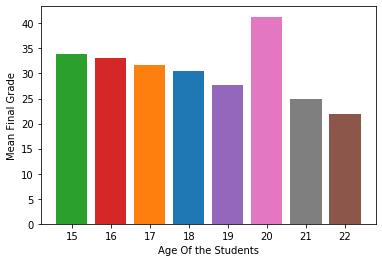

In [191]:
x = rel_plot('age', 'Age Of the Students', 'Mean Final Grade')
plt.show()

## Effect of Romantic affairs

We noted that students who don't have romantic affairs score higher grades.

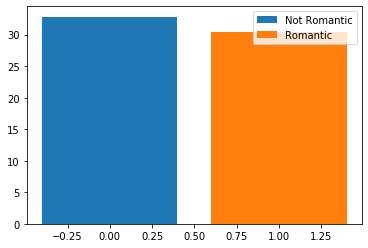

In [192]:
romanticism = {}
counts_r = df.romantic_yes.value_counts()
r_yes = counts_r[1]
r_no = counts_r[0]
romanticism[0] = 0
romanticism[1] = 0
for i in range(395):
    romanticism[df['romantic_yes'].loc[i]] += df['final_grade'].loc[i]
for key,value in romanticism.items():
    romanticism[key] = value/counts_r[key] 
ax = []    
for key,value in romanticism.items():
    ax.append(plt.bar(key, value))   
plt.legend((ax),
          ('Not Romantic','Romantic'),
          loc='upper right')    
plt.show()    
  

{'at_home': 1728, 'health': 1248, 'other': 4255, 'services': 3463, 'teacher': 1961}


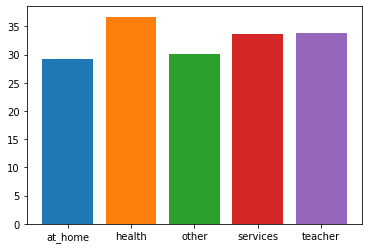

In [193]:
M= df_origin.loc[:,'Mjob'].unique()
Mjob_d = {}
for i in M:
    Mjob_d[i] = 0
for i in range(395):
    Mjob_d[df_origin['Mjob'].loc[i]] += df_origin['final_grade'].loc[i]

print(Mjob_d)

counts_m = df_origin.Mjob.value_counts()  
for key,value in Mjob_d.items():
    Mjob_d[key] = value/counts_m[key]

for key,value in Mjob_d.items():
    plt.bar(key, Mjob_d[key]) 
    
  

## If Father Is A Teacher , Student Scores Higher

{'teacher': 1069, 'other': 6764, 'services': 3553, 'health': 620, 'at_home': 649}


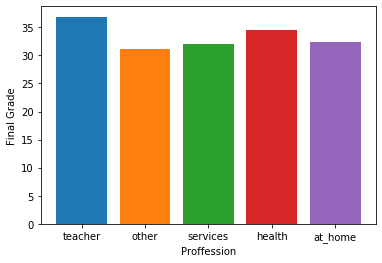

In [245]:
x = rel_plot('Fjob','Proffession','Final Grade')
plt.show()

### Students Who Have Internet Access , Score Higher Grades

{'no': 1947, 'yes': 10708}


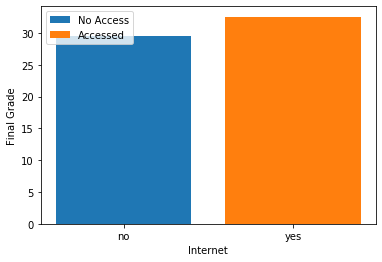

In [246]:
x =rel_plot('internet','Internet', 'Final Grade')
plt.legend((x),
          ('No Access', 'Accessed'),
          loc='upper left')
plt.show()

## Healthy Students Score Higher 

{3: 30.89010989010989, 5: 31.794520547945204, 1: 35.61702127659574, 2: 32.62222222222222, 4: 31.21212121212121}


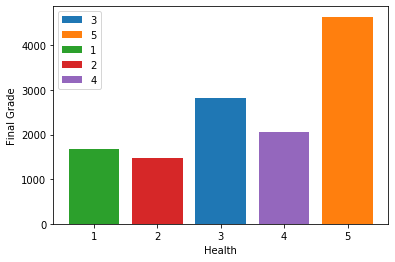

In [198]:
P= df_origin.loc[:,'health'].unique()
health_d = {}
for i in P:
    health_d[i] = 0  
for i in range(395):
    health_d[df_origin['health'].loc[i]] += df_origin['final_grade'].loc[i]

print(Pstatus_d) 
counts_h = df.health.value_counts()  
for key,value in health_d.items():
    Pstatus_d[key] = value/counts_h[key]
axe=[]
for key,value in health_d.items():
    axe.append(plt.bar(key, health_d[key])) 
    
plt.xlabel("Health")   
plt.ylabel('Final Grade')
plt.legend((axe),
          ([3,5,1,2,4]),
          loc='upper left')
plt.show()

## Students Who Bunked Classes More, Got Lesser Marks

{6: 1055, 4: 1761, 10: 564, 2: 2297, 0: 3321, 16: 210, 14: 346, 7: 242, 8: 702, 25: 28, 12: 388, 54: 34, 18: 132, 26: 19, 20: 142, 56: 26, 24: 54, 28: 28, 5: 169, 13: 108, 15: 73, 22: 77, 3: 276, 21: 53, 1: 114, 75: 28, 30: 24, 19: 30, 9: 118, 11: 107, 38: 25, 40: 35, 23: 39, 17: 30}


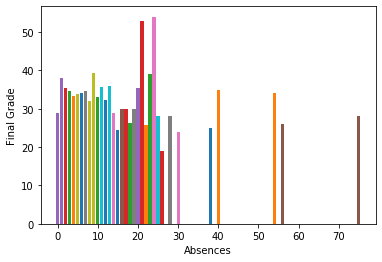

In [202]:
x = rel_plot('absences','Absences','Final Grade')
plt.show()

## Greater The Studytime Better The Grades

{2: 6203, 3: 2272, 1: 3230, 4: 950}


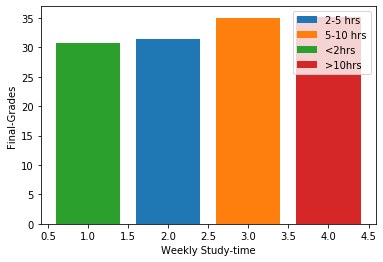

In [203]:
x = rel_plot('studytime','Weekly Study-time','Final-Grades')
plt.legend((x),
          ('2-5 hrs','5-10 hrs','<2hrs','>10hrs'))
plt.show()

## Less The Failures Better The Grades

{0: 10630, 3: 305, 2: 373, 1: 1347}


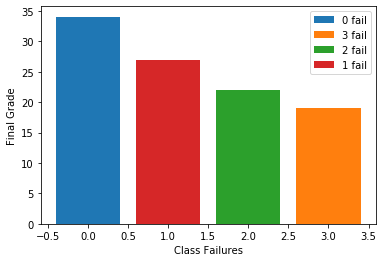

In [207]:
x = rel_plot('failures','Class Failures','Final Grade')
plt.legend((x),
          ('0 fail','3 fail','2 fail','1 fail'))
plt.show()

## Looks like Gabriel Pereira School Students Score Better than Mousinho da Silveira School Students

{'GP': 11242, 'MS': 1413}


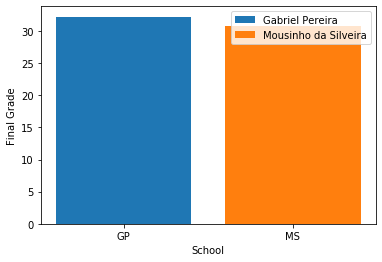

In [214]:
x = rel_plot('school', 'School','Final Grade')
plt.legend((x),
          ('Gabriel Pereira', 'Mousinho da Silveira'))
plt.show()

## If The Guardian is Other Than The Parents, They Score Lesser

{'mother': 8748, 'father': 2966, 'other': 941}


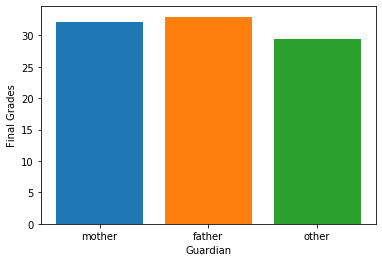

In [220]:
x = rel_plot('guardian','Guardian', 'Final Grades')
plt.show()

## Is There Any Impact of Educational Support ?

No Educational Support , Better scores

{'yes': 1432, 'no': 11223}


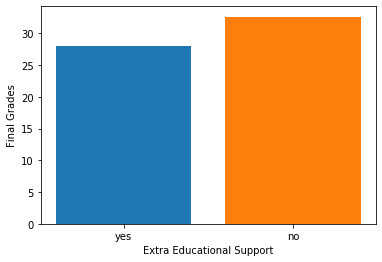

In [225]:
x = rel_plot('schoolsup','Extra Educational Support','Final Grades')
plt.show()

## Students Having Extra Paid Classes within the Course Subjects Score Better

{'no': 6661, 'yes': 5994}


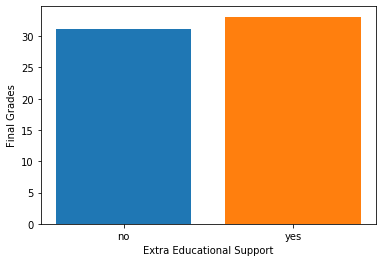

In [228]:
x = rel_plot('paid','Extra Educational Support','Final Grades')
plt.show()

## Students Who Don't Hangout with friends Often, Score Higher..

{4: 2592, 3: 4328, 2: 3504, 1: 731, 5: 1500}


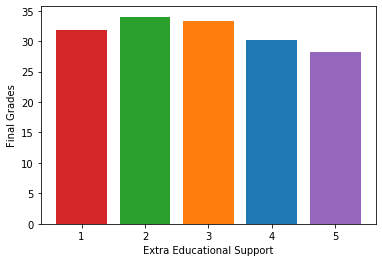

In [232]:
x = rel_plot('goout','Extra Educational Support','Final Grades')
#1 -> Goes out less
#5 -> Goes out with friends more

## More Free time --> Higher Grades

{3: 4778, 2: 2262, 4: 3660, 1: 578, 5: 1377}


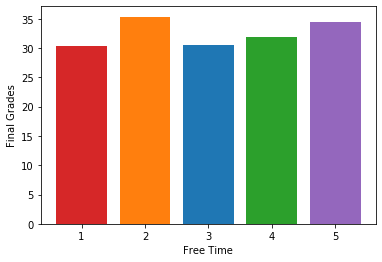

In [234]:
x = rel_plot('freetime','Free Time','Final Grades')


## Students Who Have Ambitions For Higher Education, Score Higher

{'yes': 12196, 'no': 459}


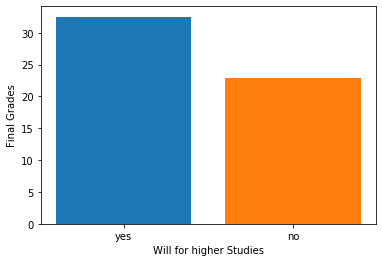

In [238]:
x = rel_plot('higher','Will for higher Studies','Final Grades')

## Looks Like Boys Are Scoring Higher Than Girls

{'F': 6443, 'M': 6212}


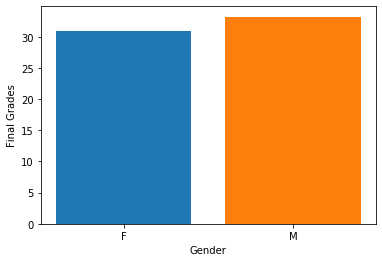

In [242]:
x = rel_plot('sex','Gender','Final Grades')

## Urban Area Students Are Scoring Higher Than Students In Rural Area

{'U': 10031, 'R': 2624}


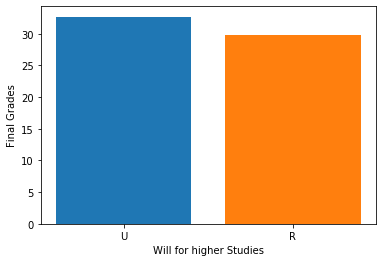

In [244]:
x = rel_plot('address','Will for higher Studies','Final Grades')